Tady budu vkladat nejaky svuj bordel a potrebne package

In [1]:
library(readxl) #package na cteni excelu
library(dplyr) #muj nejmilovanejsi package


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# Silový a funkční trénink - stání na jedné noze

Nejdříve načtu data a provedu nutné úpravy.

In [2]:
jedna_noha <- read_excel("na_jedne_noze.xlsx") #nactu data

#zbavim se sloupce s cislem jednotlivych pozorovani a taky poslednich 3 radku
jedna_noha <- jedna_noha[2:(nrow(jedna_noha)),2:ncol(jedna_noha)] 

colnames(jedna_noha) <- c("sil_ldk","sil_pdk","fun_ldk","fun_pdk") #prejmenuji sloupce
jedna_noha %>% glimpse()
jedna_noha <- data.frame(lapply(jedna_noha, function(x) as.numeric(as.character(x)))) #vsechny chracters prehodi na numeric

New names:
* `` -> ...1
* `` -> ...3
* `` -> ...5


Observations: 10
Variables: 4
$ sil_ldk <chr> "17", "78", "85", "76", "78", "85", "30", "75", "73", "25"
$ sil_pdk <chr> "19", "47", "51", "80", "80", "51", "90", "52", "56", "38"
$ fun_ldk <chr> "65", "76", "30", "90", "86", "205", "165", "201", "79", "37"
$ fun_pdk <chr> "92", "64", "90", "86", "75", "194", "135", "195", "92", "83"


## Dvouvýběrový Wilcoxonův test

Jednotlivci byli rozděleni do dvou skupin po deseti. První skupina prošla Silovým tréninkem, druhá Funkčním tréninkem. Chci ověřit, který ze dvou tréninků je účinnější. U každého jednotlivce jsem změřil, jak dlouho vydrží stát na každé noze, a předpokládám, že tato výdrž perfektně reflektuje účinky tréninku. K porovnání účinnosti tréninků použiji Dvouvýběrový Wilcoxonův test. Vyhodnotím nejdříve účinky tréninků na levé nohy, potom na pravé nohy.

Pro první Dvouvýběrový Wilcoxonův test tedy zavádím nulovou hypotézu, že rozdělení výběrů obou tréninků jsou stejná pro levou nohu. Alternativní hypotéza je, že výběry pochází z různých rozdělení. Pro druhý test zavádím nulovou hypotézu, že rozdělení výběrů obou tréninků jsou stejná pro pravou nohu. Alternativní hypotéza je, že výběry pochází z různých rozdělení. Pro oba testy použiji standardní hladinu $\alpha = 0.05$. Oba testy jsou oboustranné.

In [3]:
#test pro levou dolni koncetinu
ldk_wt <- wilcox.test(jedna_noha$sil_ldk, jedna_noha$fun_ldk, alternative = c("two.sided"), paired = FALSE, correct = FALSE)
ldk_wt

#test pro pravou dolni koncetinu
pdk_wt <- wilcox.test(jedna_noha$sil_pdk, jedna_noha$fun_pdk, alternative = c("two.sided"), paired = FALSE, correct = FALSE)
pdk_wt

Warning message in wilcox.test.default(jedna_noha$sil_ldk, jedna_noha$fun_ldk, alternative = c("two.sided"), :
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test

data:  jedna_noha$sil_ldk and jedna_noha$fun_ldk
W = 28, p-value = 0.0958
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(jedna_noha$sil_pdk, jedna_noha$fun_pdk, alternative = c("two.sided"), :
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test

data:  jedna_noha$sil_pdk and jedna_noha$fun_pdk
W = 8.5, p-value = 0.001679
alternative hypothesis: true location shift is not equal to 0


Na hladině $\alpha = 0.05$ nezamítám v testu pro levé nohy nulovou hypotézu. Tedy nemám dostatek důkazů pro tvrzení, že jeden z tréninků je pro levou nohu účinnější než druhý.

Na hladině $\alpha = 0.05$ zamítám nulovou hypotézu v testu pro pravé nohy, což mě vede k závěru, že výběry pochází z různých rozdělení. Tedy mám dostatek důkazů pro tvrzení, že jeden z testů je účinnější než druhý. 



Ještě mohu použít jednostranné Dvouvýběrové Wilcoxonovy testy.

Znovu aplikuji dva Dvouvýběrové testy, tentokrát však jednostranné. Pro oba dva testy tedy pokládám nulovou hypotézu, že výběr ze Silového tréninku pochází z rozdělení s vyšším nebo rovným mediánem než výběr z Funkčního tréninku. Alternativní hypotéza zní, že výběr ze Silového tréninku pochází z rozdělení s menším mediánem než výběr z Funkčního tréninku. Volím standardní hladinu $\alpha = 0.05$.

In [4]:
one_side_ldk <- wilcox.test(jedna_noha$sil_ldk, jedna_noha$fun_ldk,
                            alternative = c("less"), paired = FALSE, correct = FALSE)
one_side_ldk


one_side_pdk <- wilcox.test(jedna_noha$sil_pdk, jedna_noha$fun_pdk, 
                            alternative = c("less"), paired = FALSE, correct = FALSE)
one_side_pdk

Warning message in wilcox.test.default(jedna_noha$sil_ldk, jedna_noha$fun_ldk, alternative = c("less"), :
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test

data:  jedna_noha$sil_ldk and jedna_noha$fun_ldk
W = 28, p-value = 0.0479
alternative hypothesis: true location shift is less than 0


Warning message in wilcox.test.default(jedna_noha$sil_pdk, jedna_noha$fun_pdk, alternative = c("less"), :
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test

data:  jedna_noha$sil_pdk and jedna_noha$fun_pdk
W = 8.5, p-value = 0.0008395
alternative hypothesis: true location shift is less than 0


V testu pro pravé dolní končetiny vyvracím nulovou hypotézu, tedy docházím k závěru, že Funkční trénink je účinnější na (rekonvalscenci? tohle si přepiš pak sama) pravé dolní končetiny než Silový trénink. 

V testu pro levé dolní končetiny se mi podařilo vyvrátit nulovou hypotézu, tedy na základě zvolené hladiny a výsledku testu mohu tvrdit, že v případě levé dolní končetiny je Funkční trénink účinnější než Silový trénink. 

## Boxplot

Mohu jednotlivé výběry graficky znázornit pomocí boxplotů. Výběry levých nohou jsou znázorněny pomocí červených boxplotů, výběry pravých nohou pomocí modrých boxplotů.

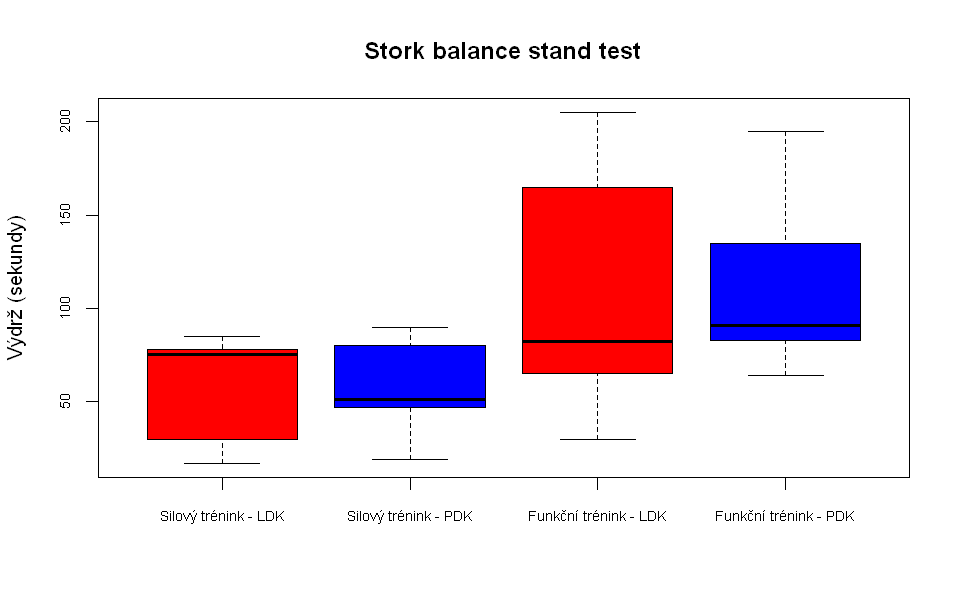

In [5]:
options(repr.plot.width=8, repr.plot.height=5)
barvicky <- c("red","blue")
popis <- c("Silový trénink - LDK","Silový trénink - PDK",
           "Funkční trénink - LDK","Funkční trénink - PDK")
boxplot(jedna_noha, xlab = "", ylab = "Výdrž (sekundy)", col = barvicky, names = popis, par(cex.axis=0.7))
title("Stork balance stand test")

# Silové a funkční tréninky - dosah nohou


In [6]:
sil <- data.frame(read_excel("sil_trenink.xlsx"))
jmena <- c("anterior", "anteromedial", "medial", "posteromedial","posterior","posterolateral","lateral","anterolateral")
colnames(sil) <- c("pohlavi", jmena,jmena)
sil <- sil[,-1]
sil <- data.frame(lapply(sil,as.numeric))

fun <- data.frame(read_excel("fun_trenink.xlsx"))
colnames(fun) <- c("pohlavi", jmena, jmena)
fun <- fun[,-1]
fun <- data.frame(lapply(fun,as.numeric))

sil_leva <- sil[,1:(ncol(sil)/2)]
sil_prav <-sil[,9:16]

fun_leva <- fun[,1:(ncol(sil)/2)]
fun_prav <- fun[,9:16]

leve <- cbind(sil_leva, fun_leva)
leve_bp <- leve[, c(1,9,2,10,3,11,4,12,5,13,6,14,7,15,8,16)]

prave <- cbind(sil_prav, fun_prav)
prave_bp <- prave[, c(1,9,2,10,3,11,4,12,5,13,6,14,7,15,8,16)]

New names:
* `` -> ...1
* `1. Anterior <U+200B>` -> `1. Anterior <U+200B>...2`
* `2. Anteromedial <U+200B>` -> `2. Anteromedial <U+200B>...3`
* `3. Media <U+200B>` -> `3. Media <U+200B>...4`
* `4. Posteromedial <U+200B>` -> `4. Posteromedial <U+200B>...5`
* ... and 12 more problems
New names:
* `` -> ...1
* `1. Anterior <U+200B>` -> `1. Anterior <U+200B>...2`
* `2. Anteromedial <U+200B>` -> `2. Anteromedial <U+200B>...3`
* `3. Media <U+200B>` -> `3. Media <U+200B>...4`
* `4. Posteromedial <U+200B>` -> `4. Posteromedial <U+200B>...5`
* ... and 12 more problems


# Boxploty

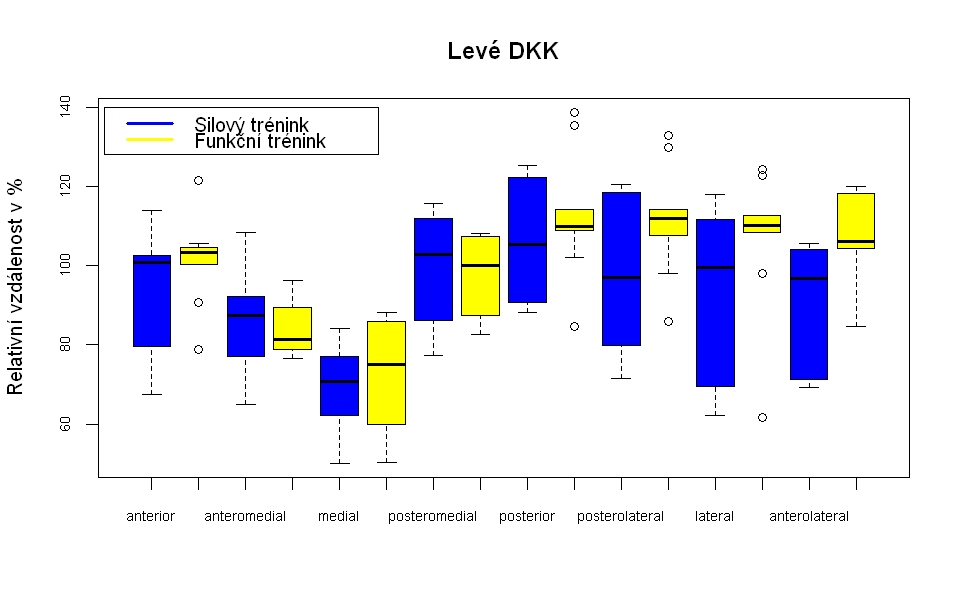

In [7]:
options(repr.plot.width=8, repr.plot.height=5)
barvicky <- c("blue","yellow")
boxplot(leve_bp, xlab = "", ylab = "Relativní vzdálenost v %", col = barvicky,  par(cex.axis=0.7))
title("Levé DKK")
legend(0,140, c("Silový trénink", "Funkční trénink"),
       col=c("blue", "yellow"), lwd=3)

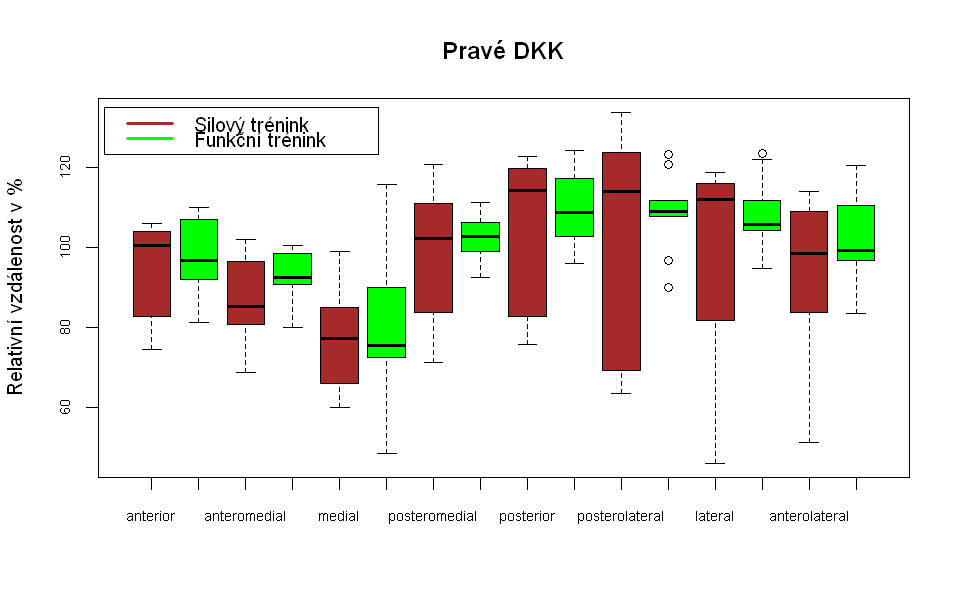

In [8]:
options(repr.plot.width=8, repr.plot.height=5)
barvicky <- c("brown","green")
boxplot(prave_bp, xlab = "", ylab = "Relativní vzdálenost v %", col = barvicky, names = colnames(leve_bp),  par(cex.axis=0.7))
title("Pravé DKK")
legend(0,135, c("Silový trénink", "Funkční trénink"),
       col=c("brown", "green"), lwd=3)

# Testování

Rozdíly mezi oběma nohama nejdříve otestuji tím způsobem, že sečtu relativní vzdálenosti pro každou nohu každého individuála, a pak porovnám celkové relativní vzdálenosti pro oba tréninky, nejdříve pro levou, a poté pro pravou nohu. Znovu použiji Wilcoxonův Dvouvýběrový test a standardní hladinu $\alpha = 0.05$.

In [9]:
sil_leva$soucet <- rowSums(sil_leva)
sil_prav$soucet <- rowSums(sil_prav)
fun_leva$soucet <- rowSums(fun_leva)
fun_prav$soucet <- rowSums(fun_prav)

In [10]:
wilcox.test(sil_leva$soucet, fun_leva$soucet, alternative = c("two.sided"), paired = FALSE, correct = FALSE)
wilcox.test(sil_prav$soucet, fun_prav$soucet, alternative = c("two.sided"), paired = FALSE, correct = FALSE)
#sil_leva$soucet
#sil_prav$soucet
#fun_leva$soucet
#fun_prav$soucet

Warning message in wilcox.test.default(sil_leva$soucet, fun_leva$soucet, alternative = c("two.sided"), :
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test

data:  sil_leva$soucet and fun_leva$soucet
W = 40.5, p-value = 0.4725
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  sil_prav$soucet and fun_prav$soucet
W = 53, p-value = 0.8534
alternative hypothesis: true location shift is not equal to 0


Ani u jednoho z testů se mi nepodařilo vyvrátit nulovou hypotézu. Tedy nemám dostatečné podklady, abych tvrdil, že se jeden z tréninků svou efektivitou liší od druhého.

Data mohu zrelativizovat ještě jednou. Aplikuji lineární transformaci, kdy každá dosažená relativní vzdálenost pro daný cvik bude vydělena průměrnou dosaženou relativní vzdáleností v daném cviku, pro každou nohu a každý test zvlášť. Potom znovu aplikuji Wilcoxonův Dvouvýběrový test se standardní hladinou $\alpha = 0.05$.

In [11]:
sil_leva <- sil_leva[,-ncol(sil_leva)]
sil_prav <- sil_prav[,-ncol(sil_prav)]
fun_leva <- fun_leva[,-ncol(fun_leva)]
fun_prav <- fun_leva[,-ncol(fun_prav)]

for (i in 1:8){
    sil_leva[,i] <- sil_leva[,i]/mean(sil_leva[,i])
    sil_prav[,i] <- sil_prav[,i]/mean(sil_prav[,i])
    fun_leva[,i] <- fun_leva[,i]/mean(fun_leva[,i])
    fun_prav[,i] <- fun_prav[,i]/mean(fun_prav[,i])
}
sil_leva$soucet <- rowSums(sil_leva)
sil_prav$soucet <- rowSums(sil_prav)
fun_leva$soucet <- rowSums(fun_leva)
fun_prav$soucet <- rowSums(fun_prav)


In [12]:
wilcox.test(sil_leva$soucet, fun_leva$soucet, alternative = c("two.sided"), paired = FALSE, correct = FALSE)
wilcox.test(sil_prav$soucet, fun_prav$soucet, alternative = c("two.sided"), paired = FALSE, correct = FALSE)
#sil_leva$soucet
#sil_prav$soucet
#fun_leva$soucet
#fun_prav$soucet


	Wilcoxon rank sum test

data:  sil_leva$soucet and fun_leva$soucet
W = 56, p-value = 0.6842
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  sil_prav$soucet and fun_prav$soucet
W = 61, p-value = 0.4359
alternative hypothesis: true location shift is not equal to 0


Ani u jednoho z testů se mi nepodařilo vyvrátit nulovou hypotézu. Tedy nemám dostatečné podklady, abych tvrdil, že se jeden z tréninků svou efektivitou liší od druhého.

## Pády

Nyní zhodnotím, která skupina měla více tendenci padat. Pro každého jednotlivce zprůměruji jeho počet pádů. Podívám se na data:

In [13]:
pady <- data.frame(read_excel("pady.xlsx")) #celkove soucty padu pro kazdeho individuala
pady <- pady /3 # chci prumery - vydelim trojkou (pocet padu)
pady #podivam se na data

sil,fun
3.3333333,2.6666667
1.3333333,1.0000000
2.6666667,0.3333333
2.3333333,0.3333333
1.0000000,0.3333333
0.6666667,0.0000000
0.3333333,0.0000000
2.6666667,0.3333333
0.3333333,0.3333333
0.6666667,0.6666667


Je vidět, že skupina procházející funkčním tréninkem padala méně nebo stejně než skupina procházející silovým tréninkem. Aplikuji tedy jednostranný Dvouvýběrový Wilcoxonův test a jednostranný Dvouvýběrový t-test. Pokládám nulovou hypotézu, že skupina procházející funkčním tréninkem padala více nebo stejně než druhá skupina. Použiji hladinu $\alpha = 0.05$.

In [14]:
wilcox.test(pady$fun, pady$sil, alternative = c("less"), paired = FALSE, correct = FALSE)
t.test(pady$fun, pady$sil, alternative = c("less"), paired = FALSE, correct = FALSE, var.equal = FALSE)

Warning message in wilcox.test.default(pady$fun, pady$sil, alternative = c("less"), :
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test

data:  pady$fun and pady$sil
W = 20.5, p-value = 0.01108
alternative hypothesis: true location shift is less than 0



	Welch Two Sample t-test

data:  pady$fun and pady$sil
t = -2.1689, df = 16.148, p-value = 0.02268
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.1824465
sample estimates:
mean of x mean of y 
 0.600000  1.533333 


Oba dva testy zamítají nulovou hypotézu, tedy docházím k závěru, že skupina procházející funkčním tréninkem padale méně než skupina procházející funkčním tréninkem. 

### Vizualizace

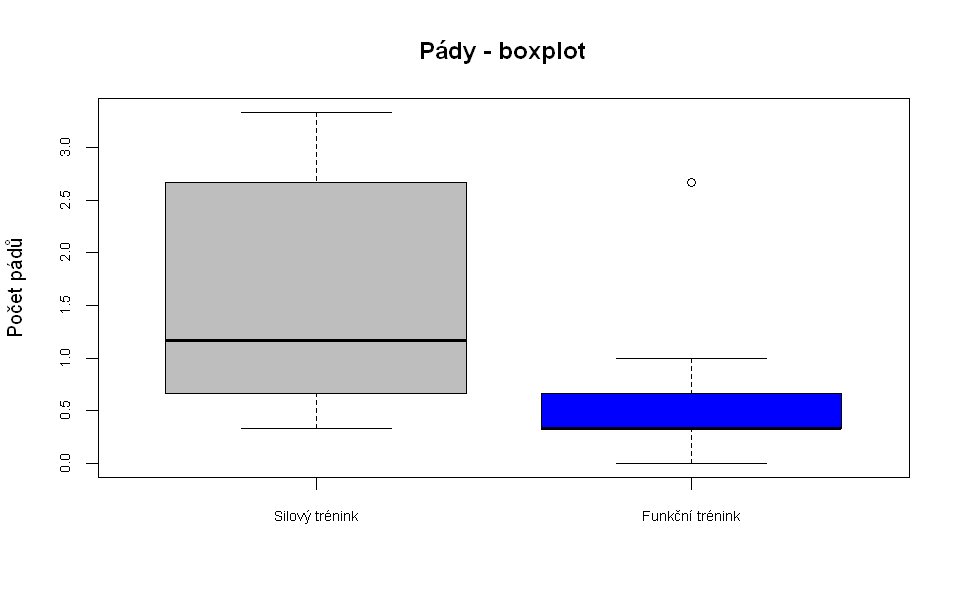

In [15]:
options(repr.plot.width=8, repr.plot.height=5)
barvicky <- c("grey","blue")
popis <- c("Silový trénink","Funkční trénink")
boxplot(pady, xlab = "", ylab = "Počet pádů", col = barvicky, names = popis, par(cex.axis=0.7))
title("Pády - boxplot")

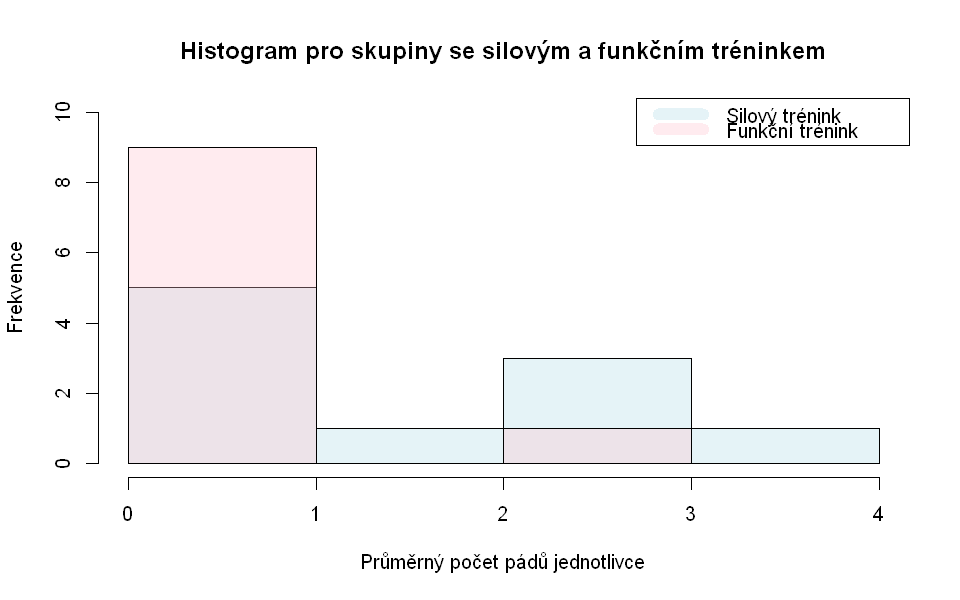

In [16]:
#breaks
posloupnost <- pretty(0:4, n = 4) # Make a neat vector for the breakpoints

#barvicky
modra <- rgb(173,216,230, max = 255, alpha = 80, names = "lt.blue")
ruzova <- rgb(255,192,203, max = 255, alpha = 80, names = "lt.pink")

#histogramy
hist_sil <- hist(pady$sil, breaks = posloupnost, plot = 0)
hist_fun <- hist(pady$fun, breaks = posloupnost, plot = 0)
plot(hist_sil, freq = TRUE, xlim = c(0,4), ylim = c(0,10),
     main = "Histogram pro skupiny se silovým a funkčním tréninkem",
     xlab = "Průměrný počet pádů jednotlivce", ylab = "Frekvence", col = modra)
plot(hist_fun, freq = TRUE, xlim = c(0,4), ylim = c(0,2), col = ruzova, add = TRUE)
legend("topright", legend = c("Silový trénink","Funkční trénink"), col = c(modra, ruzova), lwd = 10)